In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [2]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

#dim ethen
dim = 48

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethen_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethen_6-31g**.npy"), dim), 
)

[-] 2018-05-01 13:23:39: Data set normalized. Mean value std: 0.015439880365557615


# MF Initializer 

In [3]:
from SCFInitialGuess.utilities.analysis import mf_initializer, mf_initializer_damping, mf_initializer_diis
mf_initializer = mf_initializer

# Ethan
dim = 48

dim^2 = 2304

dim_ut = 1176

In [4]:
dim_triu = int(dim * (dim + 1) / 2)

In [5]:
from SCFInitialGuess.nn.networks import EluFixedValue

graph = tf.Graph()

structure, weights, biases = np.load("network_ethen.npy", encoding="latin1")

with graph.as_default():
    sess = tf.Session()
    network = EluFixedValue(structure, weights, biases)
    network.setup()
    sess.run(tf.global_variables_initializer())

In [6]:
p = network.run(sess, dataset.testing[0])

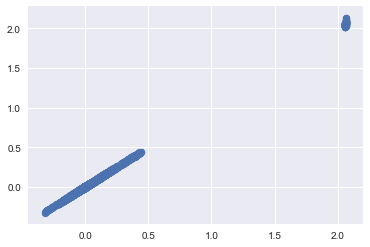

In [7]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [8]:
from SCFInitialGuess.utilities.analysis import measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:23:40: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:41: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:41: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:42: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:42: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:43: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:43: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:44: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:44: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:44: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:45: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:45: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:47: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:47: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:47: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:48: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:48: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:48: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:49: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:50: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:50: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:50: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:51: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:51: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:51: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:52: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:52: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:53: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:53: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:53: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:54: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:54: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:55: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:55: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:55: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:56: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:56: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:56: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:57: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:57: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:57: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:58: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:58: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:59: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:59: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:00: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:00: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [9]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.64042E-03 +- 2.67890E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.69687E-03 +- 4.19939E-04
--- Occupance Error ---
1.59257E+01 +- 1.08292E-01
--- Avg. Iterations ---
1.39400E+01 +- 3.58558E+00



## McWheeny that shit

In [10]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [11]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [12]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [13]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:24:00: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:01: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:01: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:02: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:02: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:02: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:03: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:03: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:03: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:04: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:04: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:05: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:05: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:06: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:06: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:06: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:07: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:07: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:07: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:08: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:08: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:08: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:09: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:09: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:09: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:10: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:10: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:10: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:12: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:12: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:13: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:14: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:14: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:15: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:15: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:16: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:16: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:17: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:17: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:18: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:18: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:19: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:19: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:20: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:20: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:20: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:21: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [14]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
8.69434E-04 +- 1.61376E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
6.10517E-05 +- 2.23321E-05
--- Occupance Error ---
1.59966E+01 +- 4.58325E-03
--- Avg. Iterations ---
1.21400E+01 +- 2.83556E+00



In [15]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:24:22: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:22: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:22: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:23: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:23: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:24: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:24: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:24: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:25: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:25: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:26: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:26: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:27: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:27: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:28: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:28: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:29: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:29: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:30: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:30: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:30: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:31: Iteration calculation: 21
[ ] 2018-05-01 13:24:31: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:31: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:32: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:32: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:32: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:33: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:33: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:33: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:34: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:34: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:36: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:36: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:37: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:37: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:38: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:38: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:38: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:39: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:39: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:40: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:41: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:41: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:41: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:42: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:43: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [16]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
8.66708E-04 +- 1.60661E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.46767E-17 +- 2.18259E-18
--- Occupance Error ---
1.60000E+01 +- 2.28868E-15
--- Avg. Iterations ---
1.20800E+01 +- 2.93148E+00



## Classical Ethan

In [17]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [18]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:25:19: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:19: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:20: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:21: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:22: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:22: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:23: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:23: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:24: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:24: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:25: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:25: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:26: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:27: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:27: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:28: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:28: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:29: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:29: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:30: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:31: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:31: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:32: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:33: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:33: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:34: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:35: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:36: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:37: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:38: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:39: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:39: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:40: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:41: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:41: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:42: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:43: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:44: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:44: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:45: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:46: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:46: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:47: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:48: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:49: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:49: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:50: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:51: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:51: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:52: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [19]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.87219E-02 +- 6.42558E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.05353E-02 +- 6.45466E-04
--- Occupance Error ---
1.60000E+01 +- 3.71764E-15
--- Avg. Iterations ---
1.30000E+01 +- 2.18174E+00



In [20]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:25:53: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:54: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:55: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:55: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:56: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:57: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:58: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:59: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:59: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:00: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:01: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:01: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:02: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:03: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:03: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:04: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:04: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:05: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:05: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:06: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:07: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:08: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:08: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:09: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:10: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:10: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:11: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:11: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:12: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:13: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:13: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:14: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:15: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:15: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:16: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:17: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:17: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:18: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:18: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:19: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:20: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:21: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:21: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:22: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:23: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:24: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:25: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:25: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:26: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:27: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [21]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.71987E-02 +- 6.45615E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.04512E-02 +- 7.49031E-04
--- Occupance Error ---
1.59862E+01 +- 9.48825E-05
--- Avg. Iterations ---
1.22200E+01 +- 2.12876E+00



In [22]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    0,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:26:27: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:28: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:29: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:30: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:31: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:31: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:32: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:33: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:34: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:35: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:36: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:37: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:38: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:39: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:40: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:40: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:41: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:42: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:43: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:44: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:45: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:46: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:46: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:47: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:48: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:48: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:49: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:49: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:50: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:51: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:51: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:52: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:53: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:53: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:54: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:54: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:55: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:55: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:56: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:57: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:57: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:58: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:59: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:00: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:00: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:01: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:02: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:03: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:04: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:05: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [23]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.31288E-02 +- 1.16188E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
4.94122E-17 +- 1.25275E-17
--- Occupance Error ---
1.60000E+01 +- 6.70325E-15
--- Avg. Iterations ---
1.33000E+01 +- 1.15326E+00

